# MNIST

In [10]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [30]:
#load data
raw_train = read_idx("./data/train-images.idx3-ubyte")
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx("./data/train-labels.idx1-ubyte")

raw_test = read_idx("./data/t10k-images.idx3-ubyte")
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx("./data/t10k-labels.idx1-ubyte")

C:\Users\Mecors\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


## Exploratory Data

문제와 데이터 구조 및 분포 소개

In [4]:
#train data shape
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


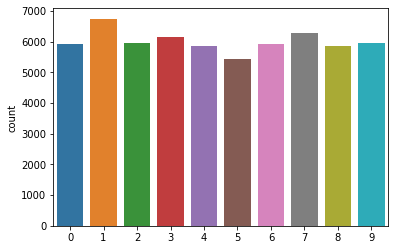

In [5]:
import seaborn as sns

sns.countplot(train_label) #label distribution

In [6]:
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
plt.show()

In [7]:
ex0 = train_data[0].reshape(28, 28)
ex1 = train_data[1].reshape(28, 28)

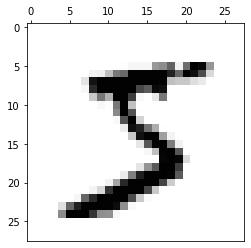

In [8]:
show(ex0)

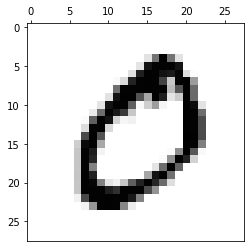

In [9]:
show(ex1)

## Scaling

minmax scaler를 이용

In [10]:
from sklearn.preprocessing import MinMaxScaler #minmax scaling

mm = MinMaxScaler()

train_mm = mm.fit_transform(train_data)

In [11]:
print(train_mm.shape)
print(train_label.shape)

(60000, 784)
(60000,)


## GridSearchCV

hyperparameter tuning

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score

#Stratified Kfold, Grid Search 를 활용한 model selection
#평가는 micro f1, macro f1, accuracy를 이용
#각 parameter의 의미

### GridSearchCV - 유승완 _ SVM (C : 0.0001 ~ 0.01)

svc = SVC()

svc_param = {'C':[0.0001, 0.0003, 0.001, 0.003, 0.01],
             'kernel':['linear']
            }

scoring = {'f1 macro': make_scorer(f1_score , average='macro'),
           'f1 micro': make_scorer(f1_score, average = 'micro'),
           'Accuracy': make_scorer(accuracy_score)
          }

svm_grid = GridSearchCV(svc, svc_param, cv = 5, scoring=scoring, refit=False, n_jobs=-1)
svm_grid.fit(train_mm, train_label)

svmcv_result = pd.DataFrame(svm_grid.cv_results_)
svmcv_result.to_csv("cv_result_유승완.csv")

### GridSearchCV - 최지웅_ SVM (C : 0.03 ~ 3)

svc = SVC()

svc_param = {'C':[0.03, 0.1, 0.3, 1, 3],
             'kernel':['linear']
            }

scoring = {'f1 macro': make_scorer(f1_score , average='macro'),
           'f1 micro': make_scorer(f1_score, average = 'micro'),
           'Accuracy': make_scorer(accuracy_score)
          }

svm_grid = GridSearchCV(svc, svc_param, cv = 5, scoring=scoring, refit=False, n_jobs=-1)
svm_grid.fit(train_mm, train_label)

svmcv_result = pd.DataFrame(svm_grid.cv_results_)
svmcv_result.to_csv("cv_result_최지웅.csv")

### GridSearchCV - 황지원_LR (solver : linear, C : 0.01 ~ 3, panalty : l1, l2)

lr = LogisticRegression()

lr_param={"solver":["liblinear"], 
          "C":[0.01, 0.03, 0.1, 0.3, 1, 3], 
          "penalty":["l1","l2"]
          }

scoring = {'f1 macro': make_scorer(f1_score , average='macro'),
           'f1 micro': make_scorer(f1_score, average = 'micro'),
           'Accuracy': make_scorer(accuracy_score)
          }

lr_grid = GridSearchCV(lr, lr_param, cv=5, scoring=scoring, refit=False, n_jobs=-1)
lr_grid.fit(train_mm, train_label)

lrcv_result = pd.DataFrame(lr_grid.cv_results_)
lrcv_result.to_csv("cv_result_황지원.csv")

### GridSearchCV - 유현상_LR (solver : saga, C : 0.01 ~ 3, panalty : l1, l2)

lr = LogisticRegression()

lr_param={"solver":["saga"], 
          "C":[0.01, 0.03, 0.1, 0.3, 1, 3], 
          "penalty":["l1","l2"]
          }

scoring = {'f1 macro': make_scorer(f1_score , average='macro'),
           'f1 micro': make_scorer(f1_score, average = 'micro'),
           'Accuracy': make_scorer(accuracy_score)
          }

lr_grid = GridSearchCV(lr, lr_param, cv=5, scoring=scoring, refit=False, n_jobs=-1)
lr_grid.fit(train_mm, train_label)

lrcv_result = pd.DataFrame(lr_grid.cv_results_)
lrcv_result.to_csv("cv_result_유현상.csv")

### GridSearchCV - 조경찬_ LR (solver : newton-cg,panalty :  l2, C : 0.01 ~ 3)

lr = LogisticRegression()

lr_param={"solver":["newton-cg"], 
          "C":[0.01, 0.03, 0.1, 0.3, 1, 3], 
          "penalty":["l2"]
          }

scoring = {'f1 macro': make_scorer(f1_score , average='macro'),
           'f1 micro': make_scorer(f1_score, average = 'micro'),
           'Accuracy': make_scorer(accuracy_score)
          }

lr_grid = GridSearchCV(lr, lr_param, cv=5, scoring=scoring, refit=False, n_jobs=-1)
lr_grid.fit(train_mm, train_label)

lrcv_result = pd.DataFrame(lr_grid.cv_results_)
lrcv_result.to_csv("cv_result_조경찬.csv")

In [1]:
# IRIS

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_data = iris.data
iris_target = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size = 0.3)

In [6]:
svc_iris = SVC(C=0.1, kernel = 'linear', probability=True)

svc_iris.fit(X_train, y_train)
pred_iris = svc_iris.predict(X_test)

In [7]:
print('SVC accuracy :{0:.4f}'.format(accuracy_score(y_test, pred_iris)))
print ('SVC F1_macro : {0:.4f}'.format(f1_score(y_test, pred_iris, average='macro')))

SVC accuracy :0.9333
SVC F1_macro : 0.9277


## ML Modeling

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_mm, train_label, test_size=0.3)

In [ ]:
svc = SVC(C=0.1, kernel = 'linear', probability=True)

svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [ ]:
print('SVC accuracy :{0:.4f}'.format(accuracy_score(y_test, pred)))
print ('SVC F1_macro : {0:.4f}'.format(f1_score(y_test, pred, average='macro')))

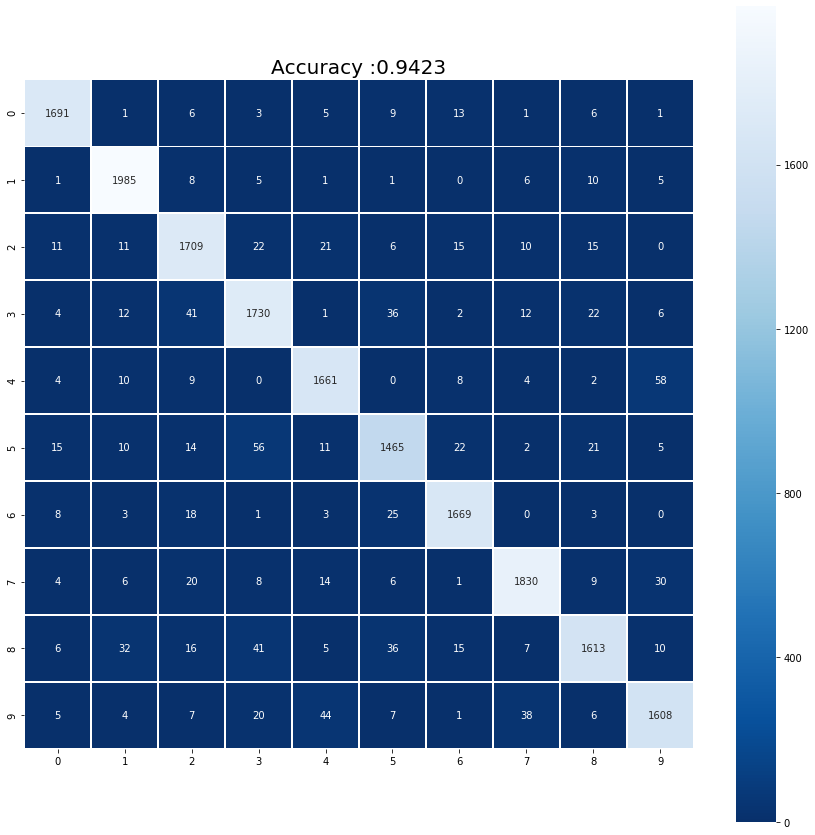

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(15, 15))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

title = 'Accuracy :{0:.4f}'.format(accuracy_score(y_test, pred))
plt.title(title, size = 20)
                                              
ax = sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Blues_r')
#ax = sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')

## Test Output

In [13]:
test_mm = mm.fit_transform(test_data)

In [14]:
final_svc = SVC(C=0.1, kernel = 'linear', probability=True)

final_svc.fit(train_mm, train_label)
pred = final_svc.predict(test_mm)

In [15]:
print('SVC accuracy :{0:.4f}'.format(accuracy_score(test_label, pred)))
print ('SVC F1_macro : {0:.4f}'.format(f1_score(test_label, pred, average='macro')))

SVC accuracy :0.9472
SVC F1_macro : 0.9463


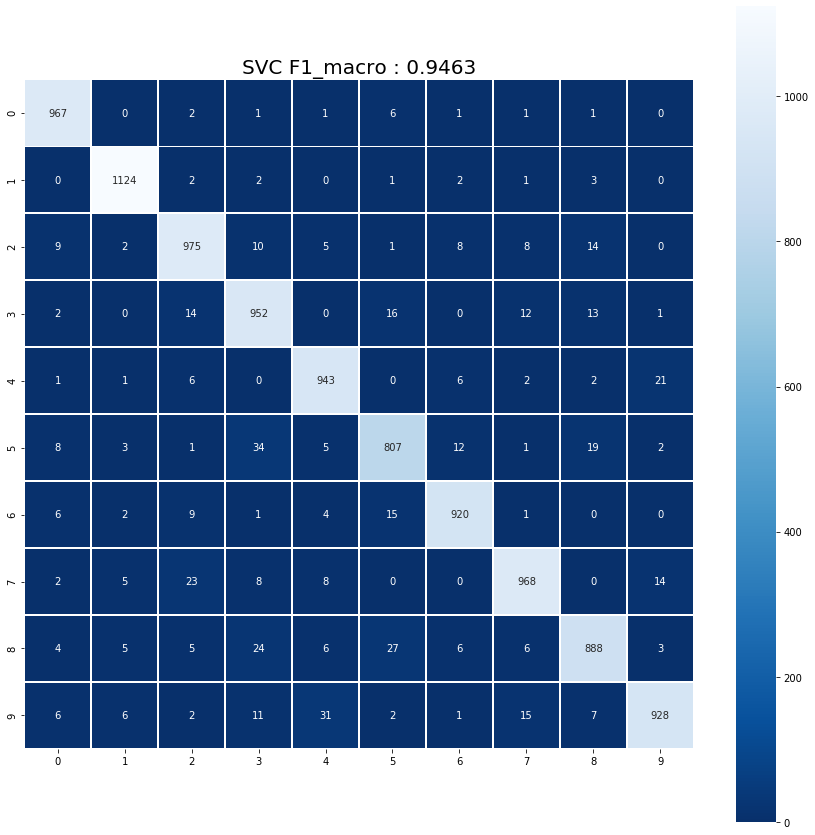

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_label, pred)

plt.figure(figsize=(15, 15))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

title = 'SVC F1_macro : {0:.4f}'.format(f1_score(test_label, pred, average='macro'))
plt.title(title, size = 20)
                                              
ax = sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Blues_r')


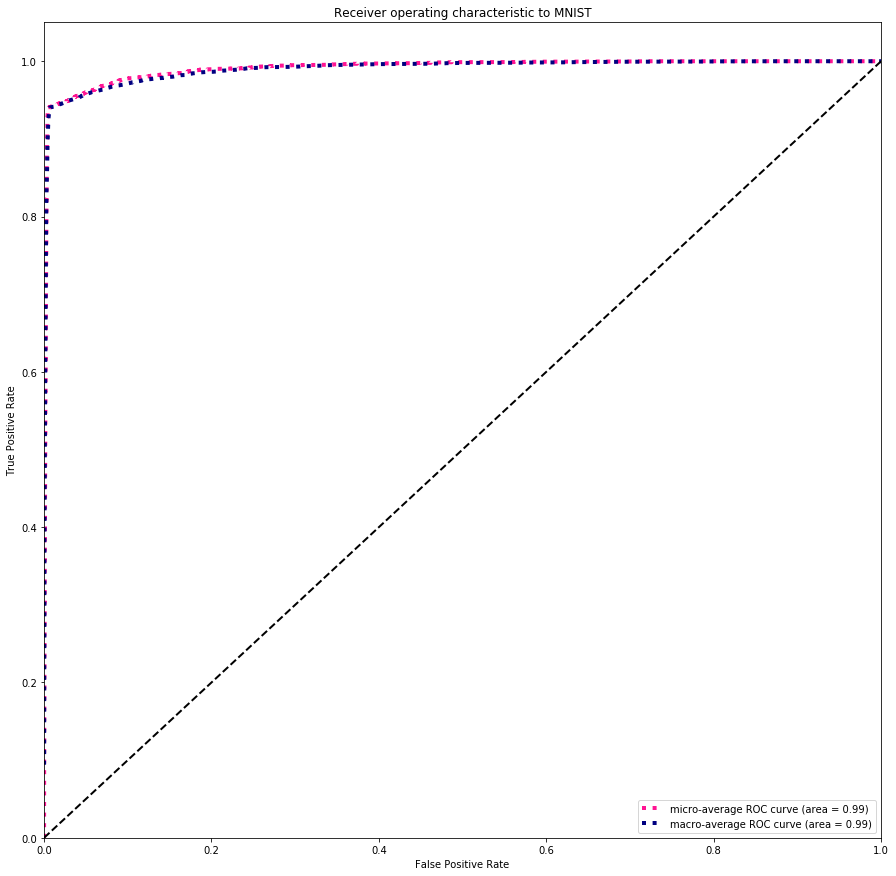

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

test_label = label_binarize(test_label, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = test_label.shape[1]

y_score = final_svc.decision_function(test_mm)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(15, 15))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to MNIST')
plt.legend(loc="lower right")
plt.show()